# PCA  —  how to choose the number of components?

## Short answer

Load dataset

In [1]:
from sklearn.datasets import load_iris 
data = load_iris().data

Remember to scale the data to the range between 0 and 1 before using PCA!

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

Typically, we want the explained variance to be between 95–99%. In Scikit-learn we can set it like this:

In [3]:
# 95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

or

In [4]:
# 99% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

## Long answer

How to select the number of components

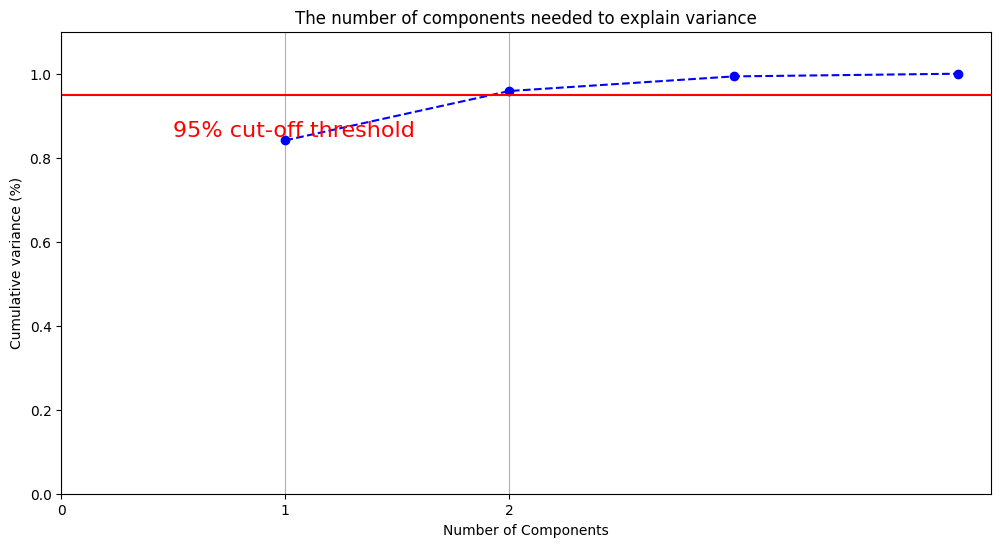

In [5]:
%matplotlib inline
import numpy as np

pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 3, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Reference(s)

Adapted from [Bartosz Mikulski](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)